**Hierarchical clustering**


In [23]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

# Leer los datos
data = pd.read_csv('Mall_Customers.csv')

In [24]:
data  = pd.read_csv('./Mall_Customers.csv')
print(data.shape)
print(data.describe())
print(data.info())

(200, 5)
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age     

In [20]:
# 2. Preprocesar datos
# Tratar valores faltantes si existen
data = data.dropna()

# 3. Seleccionar características relevantes
X = data[['CustomerID', 'Age', 'Annual Income (k$)']]

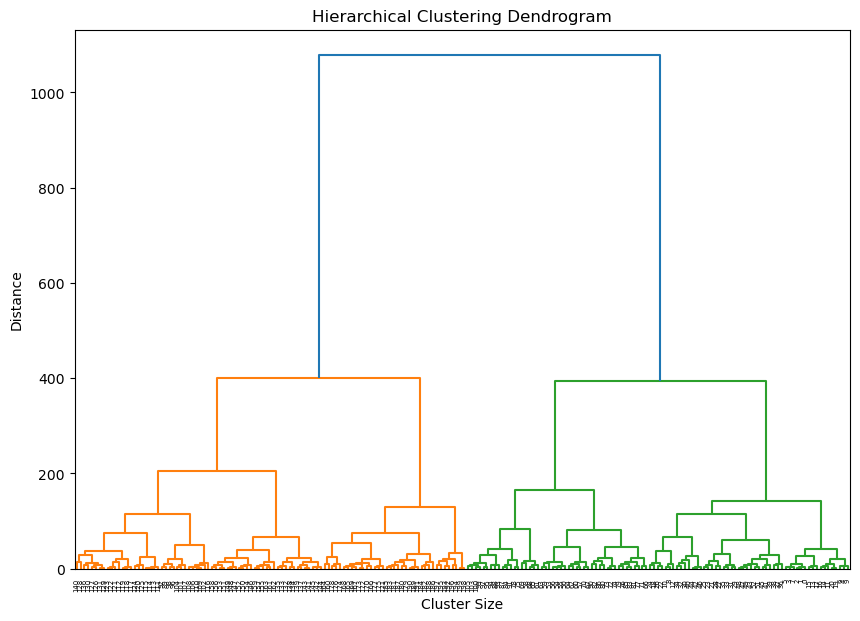

In [39]:
# Estandarizar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Entrenamiento del modelo
'''Modelo de ejecución de entrenamiento'''
from scipy.cluster.hierarchy import dendrogram, linkage

# Utilizar el método de vinculación 'ward' que minimiza la varianza de los clusters que se fusionan
linked = linkage(X, method='ward')
#
# Visualización con un dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=data.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

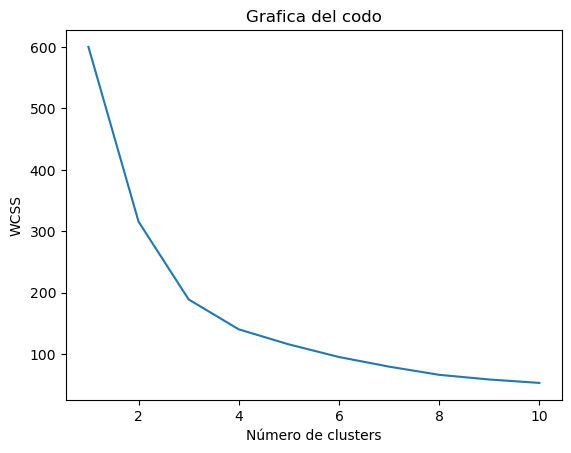

In [28]:
# Gráfica de Codo para determinar K óptimo
plt.plot(range(1, 11), wcss)
plt.title('Grafica del codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

In [30]:
# 5. Evaluar modelos
print('Silhouette Score K-Means: ', silhouette_score(X_scaled, y_kmeans))
print('Silhouette Score Hierarchical: ', silhouette_score(X_scaled, y_hierarchical))
print('Calinski-Harabasz Score K-Means: ', calinski_harabasz_score(X_scaled, y_kmeans))
print('Calinski-Harabasz Score Hierarchical: ', calinski_harabasz_score(X_scaled, y_hierarchical))


Silhouette Score K-Means:  0.39072517597925754
Silhouette Score Hierarchical:  0.3800059169286977
Calinski-Harabasz Score K-Means:  203.77393067001984
Calinski-Harabasz Score Hierarchical:  183.50638520393008


In [42]:
#5. Evaluación del desempeño
#

'''Metricas de desempeño'''
from sklearn.metrics import silhouette_score, calinski_harabasz_score

'''Librería para la definición de clusters'''
from scipy.cluster.hierarchy import fcluster

#
# Decidir un número de clusters y asignar labels
# para este caso de estudio el numero de clusters será de 3
#
k = 3
clusters = fcluster(linked, k, criterion='maxclust')

print('Silhouette Score:', silhouette_score(X, clusters))
print('Calinski-Harabasz Score:', calinski_harabasz_score(X, clusters))

Silhouette Score: 0.4467284016017106
Calinski-Harabasz Score: 357.8440543655719


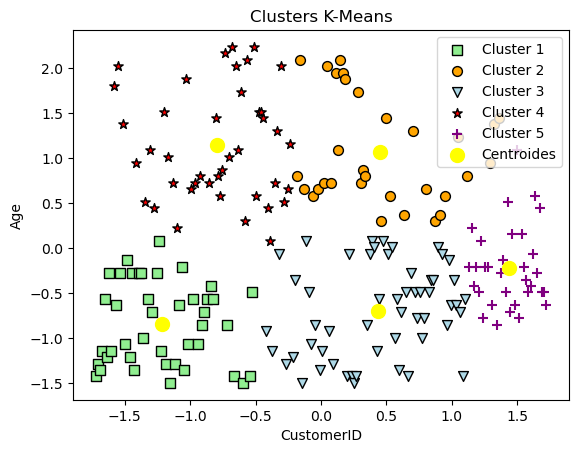

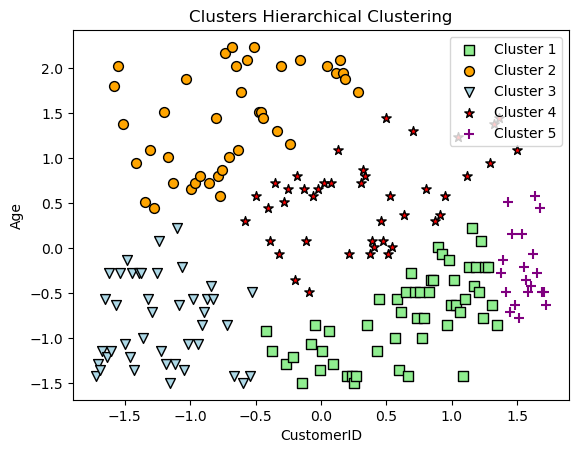

In [45]:
# Gráfica de clusters K-Means
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=50, c='lightgreen', marker='s', edgecolor='black', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=50, c='orange', marker='o', edgecolor='black', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=50, c='lightblue', marker='v', edgecolor='black', label='Cluster 3')
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], s=50, c='red', marker='*', edgecolor='black', label='Cluster 4')
plt.scatter(X_scaled[y_kmeans == 4, 0], X_scaled[y_kmeans == 4, 1], s=50, c='purple', marker='+', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', marker='o', label='Centroides')
plt.title('Clusters K-Means')
plt.xlabel('CustomerID')
plt.ylabel('Age')
plt.legend()
plt.show()

# Gráfica de clusters Hierarchical
plt.scatter(X_scaled[y_hierarchical == 0, 0], X_scaled[y_hierarchical == 0, 1], s=50, c='lightgreen', marker='s', edgecolor='black', label='Cluster 1')
plt.scatter(X_scaled[y_hierarchical == 1, 0], X_scaled[y_hierarchical == 1, 1], s=50, c='orange', marker='o', edgecolor='black', label='Cluster 2')
plt.scatter(X_scaled[y_hierarchical == 2, 0], X_scaled[y_hierarchical == 2, 1], s=50, c='lightblue', marker='v', edgecolor='black', label='Cluster 3')
plt.scatter(X_scaled[y_hierarchical == 3, 0], X_scaled[y_hierarchical == 3, 1], s=50, c='red', marker='*', edgecolor='black', label='Cluster 4')
plt.scatter(X_scaled[y_hierarchical == 4, 0], X_scaled[y_hierarchical == 4, 1], s=50, c='purple', marker='+', label='Cluster 5')
plt.title('Clusters Hierarchical Clustering')
plt.xlabel('CustomerID')
plt.ylabel('Age')
plt.legend()
plt.show()